## AIFFEL Exploration 과제 1. 인공지능과 가위바위보 하기

본 과제는 Tensirflow와 Keras를 이용한 인공지능 모델로 가위바위보 이미지를 분류하는 코드이다. 웹캠으로 촬영한 가위바위보 이미지를 업로드 후 데이터셋으로 가공해 분류를 하는 방식으로, 분류 모델의 정확도가 60% 이상에 도달하여야 한다는 조건으로 수행되었다.

### 사전 준비

1. 웹캠을 이용해 가위바위보 이미지를 촬영햐여야 하며, 아래의 사이트에서 가위바위보 이미지를 간단히 촬영 후 다운로드 할 수 있다.<br>
    [Google Teachable Machine](https://teachablemachine.withgoogle.com/, "Teachable Machine")<p><p>

2. 터미널을 이용하여 클라우드에 실습용 디렉토리인 'rock_scissor_paper'와 하위 디렉토리인 'scissor', 'paper', 'rock'을 생성한다.<br>

    mkdir -p ~/aiffel/rock_scissor_paper/scissor<br>
    mkdir -p ~/aiffel/rock_scissor_paper/rock<br>
    mkdir -p ~/aiffel/rock_scissor_paper/paper<br>

    ls -l ~/aiffel/rock_scissor_paper<p><p>

3. Jupyter를 실행하여 각각의 폴더에 가위바위보 이미지를 압축한 파일을 업로드 후, 압축을 해제한다.<br>
        
    cd  ~/aiffel/rock_scissor_paper/rock<br>
    unzip rock.zip<br>
        
    cd  ~/aiffel/rock_scissor_paper/scissor<br>
    unzip scissor.zip<br>
        
    cd  ~/aiffel/rock_scissor_paper/paper<br>
    unzip paper.zip<br>

### 가위바위보 데이터셋 준비

1. 먼저 학습용 가위바위보 데이터셋 생성이 필요한데, 이를 위해서는 Tensorflow의 표준 API인 tf.keras의 Sequential API를 이용한다.<br>

2. 다음으로 가위바위보 이미지를 불러온 후 사이즈를 조정하기 위해 PIL 라이브러리를 불러온다.<br>
    [Python Imaging Library](https://ko.wikipedia.org/wiki/Python_Imaging_Library, "Python Imaging Library")<p><p>


In [353]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)   # Tensorflow의 버전을 출력

2.6.0


In [354]:
# 가위바위보 이미지 데이터셋을 불러온 후 resize
# resize를 위해 PIL 라이브러리 사용

from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [355]:
# 가위 이미지를 28*28 사이즈로 변경

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
# nameerror : 경로의 문제인가? -> import os 선언 필요
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!


In [356]:
# 바위 이미지를 28*28 사이즈로 변경

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
바위 이미지 resize 완료!


In [357]:
# 보 이미지를 28*28 사이즈로 변경

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
보 이미지 resize 완료!


In [358]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


라벨:  0


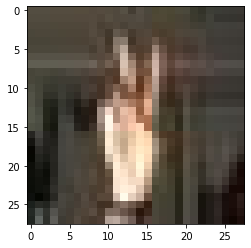

In [359]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [360]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
# input_shape=(28,28,3) : 입력할 이미지의 형태, 28*28 사이즈의 컬러 이미지이므로 3으로 지정
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
# Conv2D 레이어를 이용해 먼저 16개 이미지의 특징을 고려하고, 다음으로 32개의 이미지 특징 고려
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu')) # 분류기 알고리즘의 복잡도 수치를 설정
model.add(keras.layers.Dense(3, activation='softmax'))
# 최종 분류기의 class 수를 설정하는 코드로, 0, 1, 2(가위, 바위, 보) 총 3개의 클래스를 구분하므로 3으로 지정함

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_258 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_258 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_259 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_129 (Flatten)        (None, 800)               0         
_________________________________________________________________
dense_258 (Dense)            (None, 64)                51264     
_________________________________________________________________
dense_259 (Dense)           

In [361]:
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
# NameError: name 'x_test_norm' is not defined
# 'x_test_norm' 자체가 존재하지 않음 -> why? 테스트용 데이터셋을 생성하지 않아서 발생

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)
# 데이터 갯수에 -1을 쓰면 reshape시 자동으로 계산됨

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (900, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (900, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [256]:
# 가위바위보의 테스트 데이터셋 만들기

# 가위 이미지를 28*28 사이즈로 변경

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
# nameerror : 경로의 문제인가? -> import os 선언 필요
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [81]:
# 바위 이미지를 28*28 사이즈로 변경

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [82]:
# 보 이미지를 28*28 사이즈로 변경

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [362]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


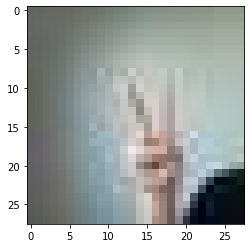

In [363]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [364]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
# input_shape=(28,28,3) : 입력할 이미지의 형태, 28*28 사이즈의 컬러 이미지이므로 3으로 지정
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
# Conv2D 레이어를 이용해 먼저 16개 이미지의 특징을 고려하고, 다음으로 32개의 이미지 특징 고려
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu')) # 분류기 알고리즘의 복잡도 수치를 설정
model.add(keras.layers.Dense(3, activation='softmax'))
# 최종 분류기의 class 수를 설정하는 코드로, 0, 1, 2(가위, 바위, 보) 총 3개의 클래스를 구분하므로 3으로 지정함

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_260 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_260 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_261 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_261 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_130 (Flatten)        (None, 800)               0         
_________________________________________________________________
dense_260 (Dense)            (None, 64)                51264     
_________________________________________________________________
dense_261 (Dense)           

In [366]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# model.fit(x_train_reshaped, y_train, epochs=3)
# epochs=3 : 전체 데이터를 3번 반복해서 학습하도록 함(가위, 바위, 보)
# ValueError: Data cardinality is ambiguous:
#  x sizes: 900
#  y sizes: 300
# Make sure all arrays contain the same number of samples. -> 초반 설계부터 잘못되었는가?
# 데이터의 갯수를 지정하는 코드가 존재하지 않아 발생하는 에러

model.fit(x_test_reshaped, y_test, epochs=10)
# 전체 300개의 데이터를 10번 반복 사용해서 학습
# 정확도가 1이 나오면 경로상의 문제로 과적합이 발생한다.

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1053 - accuracy: 0.3400
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0853 - accuracy: 0.4867
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0638 - accuracy: 0.5033
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0368 - accuracy: 0.4367
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0041 - accuracy: 0.5167
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9919 - accuracy: 0.5700
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9396 - accuracy: 0.6200
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8707 - accuracy: 0.6500
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8408 - accuracy: 0.5667
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7412 - accuracy: 0.6867


In [367]:
# 딥러닝 네트워크 테스트
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
# NameError: name 'x_test_reshaped' is not defined
# 테스트 데이터셋도 따로 만들어야 하는가? -> Yes
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.6742 - accuracy: 0.7600
test_loss: 0.6742073893547058 
test_accuracy: 0.7599999904632568


In [368]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.41207984 0.18425359 0.4036666 ]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


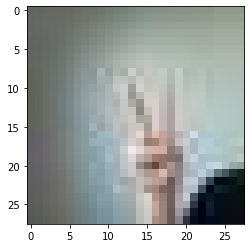

In [369]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.40242454 0.1627601  0.43481538]
라벨: 0, 예측결과: 2


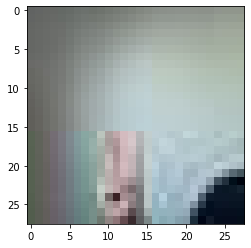

예측확률분포: [0.40288553 0.15548535 0.44162914]
라벨: 0, 예측결과: 2


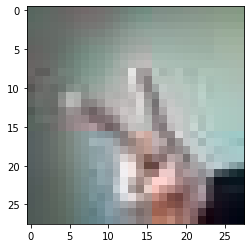

예측확률분포: [0.42381853 0.14111005 0.43507138]
라벨: 0, 예측결과: 2


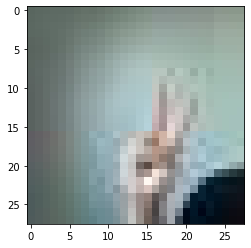

예측확률분포: [0.35825592 0.2475561  0.394188  ]
라벨: 0, 예측결과: 2


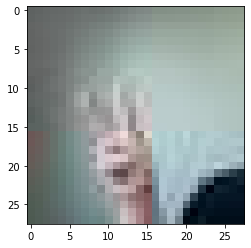

예측확률분포: [0.40708923 0.17312531 0.41978544]
라벨: 0, 예측결과: 2


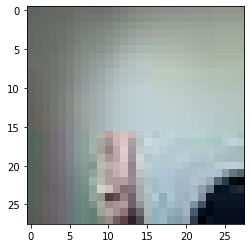

In [370]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [374]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16 # 우선적 이미지의 특징 n개
n_channel_2=32 # 이후 n개씩의 특징
n_dense=64 # 뉴런의 복잡도
n_train_epoch=3 # 반복 횟수

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_268 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_268 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_269 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_269 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_134 (Flatten)        (None, 800)               0         
_________________________________________________________________
dense_268 (Dense)            (None, 64)                51264     
_________________________________________________________________
dense_269 (Dense)            (None, 3)              

과제를 수행하면서 분류 모델에서 계속 30%대의 저조한 test accuracy를 보였는데, 주요 원인은
- 학습할 이미지 데이터 수의 부족
- 파라미터 값의 설정 문제
이 2가지로 볼 수 있었다. 

여러 번 이미지 변경과 파라미터 값 변경을 시도하였으나 60%에 미치지 못한 어려움이 있었으며, 이 문제는 테스트 과정에서 과적합이 발생하기 때문으로 추측된다. 데이터를 학습하고 테스트하는 과정에서 동일한 모델을 중복하여 사용했기 때문에 학습이 적합하게 이루어지지 않은 것으로 보인다.